In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

Group Members: Zhuo Chen Tiancheng Jiang

In [4]:
df = pd.read_csv("C:/Users/Pansi/Downloads/imports-85.csv")
df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [5]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['price_log'] = np.log(df['price'])
df['price_square'] = df['price'] ** 2


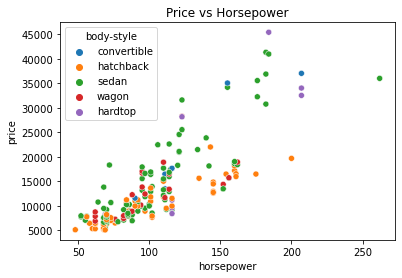

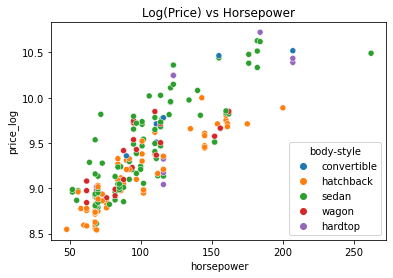

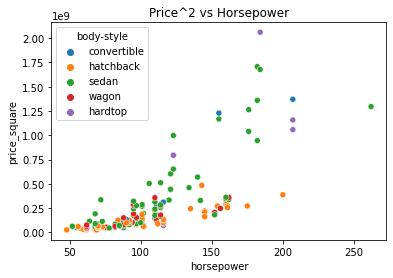

In [6]:
# Plot price vs. horsepower
sns.scatterplot(data=df, x='horsepower', y='price', hue='body-style')
plt.title('Price vs Horsepower')
plt.show()

# Plot log(price) vs. horsepower
sns.scatterplot(data=df, x='horsepower', y='price_log', hue='body-style')
plt.title('Log(Price) vs Horsepower')
plt.show()

# Plot squared price vs. horsepower
sns.scatterplot(data=df, x='horsepower', y='price_square', hue='body-style')
plt.title('Price^2 vs Horsepower')
plt.show()

##I think the body style variable appear to be revelent to the log price. 

I think the body style variable appear to be revelent to price. The log price seems to have more
of a linear relationship with horsepower. 

C:\Users\Pansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


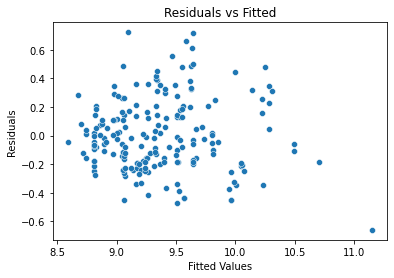

C:\Users\Pansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


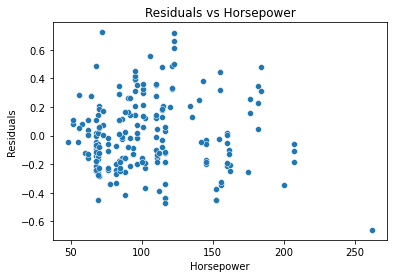

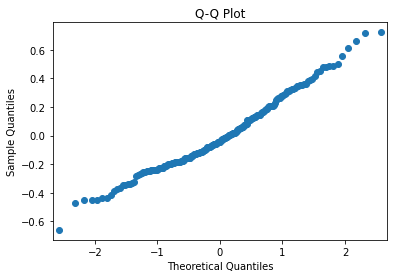

In [7]:
x=df['body-style']
result = smf.ols('price_log ~ horsepower + C(x)', data=df).fit()
# Residual diagnostics
fitted = result.fittedvalues
residuals = result.resid

# Residuals vs. fitted
sns.scatterplot(fitted,residuals)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs. horsepower
sns.scatterplot(df['horsepower'],residuals)
plt.title('Residuals vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot
sm.qqplot(residuals)
plt.title('Q-Q Plot')
plt.show()

From the residuals vs fitted plot and the residuals vs horsepower plot, we can see as the fitted values increases, the spreads are less dense. It could mean that the points are not randomly distributed or the assumption of constant variance is violated, which means that the linear regression is less suitable. From Q-Q plot, the roughly linear distribution suggests the sample is well approximated by the theroical ones. Overall we might consider modify the independent variables a bit to fit the model.    

C:\Users\Pansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'fuel efficiency vs Horsepower')

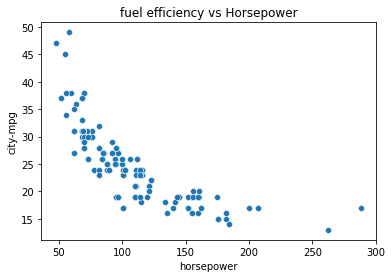

In [8]:
sns.scatterplot(df['horsepower'], df['city-mpg'])
plt.title('fuel efficiency vs Horsepower')

From the plot there is a negatively logarithmic relationship between horsepower and fuel efficiency.

In [9]:
df['mpg']=df['city-mpg']
reg = smf.ols('mpg ~ horsepower', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     366.5
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.49e-47
Time:                        15:59:09   Log-Likelihood:                -564.37
No. Observations:                 203   AIC:                             1133.
Df Residuals:                     201   BIC:                             1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1031      0.775     50.482      0.0

From the summary it seems to be a negatively relationship between horsepower and fuel efficiency. So it consistent with the plot interpretation.

[Text(0.5, 1.0, 'Average Return')]

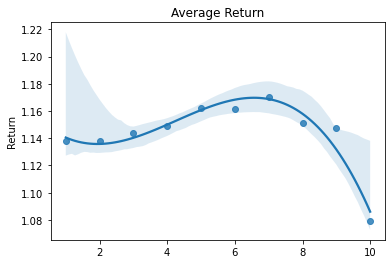

In [10]:
#Q2
StockRetAcct_DT = pd.read_csv("C:/Users/Pansi/Downloads/StockRetAcct_DT.csv")
StockRetAcct_DT['Return'] = np.exp(StockRetAcct_DT.lnAnnRet)#not sure if it's right to calculate the return
StockRetAcct_DT['ininssue_decile']=pd.qcut(StockRetAcct_DT['lnIssue'], 10, labels=np.arange(1, 11, 1))
StockRetAcct_DT = StockRetAcct_DT[StockRetAcct_DT['ininssue_decile'].notna()]
MeanReturn=StockRetAcct_DT.groupby('ininssue_decile')['Return'].mean()
plt.figure()
ax=sns.regplot(x=np.arange(1,11),y=MeanReturn, fit_reg=True,order=3)
ax.set(title = "Average Return")
#Discuss whether the pattern seems linear or not.

From the plot the relationship is less linear. It is more of a hump shape. The pattern suggests that the average return could be linearly related to the square of lnInssue variable.    

In [12]:
StockRetAcct_DT['Transformed']=0 
StockRetAcct_DT.loc[StockRetAcct_DT['ininssue_decile'] == 1, 'Transformed'] = -1
StockRetAcct_DT.loc[StockRetAcct_DT['ininssue_decile'] == 10, 'Transformed'] = 1
fm_regression = smf.ols('Return ~ Transformed', data=StockRetAcct_DT).fit()
print(fm_regression.summary())
#Create this transformed issuance variable and run a Fama-MacBeth regression with it.
#Report the results. What is the nature of the portfolio implied by the Fama-MacBeth
#regression? That is, what stocks do you go long, short, no position?

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     51.11
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           8.83e-13
Time:                        16:00:11   Log-Likelihood:                -41945.
No. Observations:               63736   AIC:                         8.389e+04
Df Residuals:                   63734   BIC:                         8.391e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1440      0.002    618.055      

From the regression result, I think we should probably choose the stocks that in insurance besides decile 1 and 10. As the coefficient is near zero. The result indicates we sould go neither long or short and just keep no position.

In [13]:
#Q3
StockRetAcct_DT['bm_vingtile_yr']=np.nan
for year in range(1981,2015):
    dt = StockRetAcct_DT[StockRetAcct_DT['year']==year]
    inds = np.where(StockRetAcct_DT['year']==year)
    StockRetAcct_DT['bm_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnBM'], 5, labels=np.arange(1, 6, 1)).values.to_list()

StockRetAcct_DT = StockRetAcct_DT[StockRetAcct_DT['bm_vingtile_yr'].notna()]
EW_BM_MutualFunds_yr=pd.DataFrame({'bm_vingtile_yr':np.tile(range(1,6), 34),
                                   'year':np.sort(np.tile(range(1981,2015),5)),
                                   'MeanRetYr':np.empty(((2014-1981+1)*5))})
for year in range(1981,2015):
    dt = StockRetAcct_DT[StockRetAcct_DT['year']==year]
    inds = np.where(EW_BM_MutualFunds_yr['year']==year)
    EW_BM_MutualFunds_yr['MeanRetYr'].iloc[inds] = list(dt.groupby('bm_vingtile_yr')['Return'].mean())

EW_BM_MutualFunds_yr = EW_BM_MutualFunds_yr.groupby('bm_vingtile_yr')['MeanRetYr'].mean()
EW_BM_MutualFunds_yr


C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StockRetAcct_DT['bm_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnBM'], 5, labels=np.arange(1, 6, 1)).values.to_list()
C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StockRetAcct_DT['bm_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnBM'], 5, labels=np.arange(1, 6, 1)).values.to_list()
C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StockRetAcct_DT['bm_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnBM'], 5, labels=np.arange(1, 6, 1)).values.to_list()
C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StockRetAcct_DT['bm_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnBM'], 5, labels=np.arange(1, 6, 1)).values.to_list()
C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW_BM_MutualFunds_yr['MeanRetYr'].iloc[inds] = list(dt.groupby('bm_vingtile_yr')['Return'].mean())
C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW_BM_MutualFunds_yr['MeanRetYr'].iloc[inds] = list(dt.groupby('bm_vingtile_yr')['Return'].mean())
C:\Users\Pansi\AppData\Local\Temp\ipykernel_20152\526385568.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

bm_vingtile_yr
1    1.119156
2    1.126647
3    1.144051
4    1.149554
5    1.157480
Name: MeanRetYr, dtype: float64

In [30]:
StockRetAcct_DT['me_vingtile_yr']=np.nan
for year in range(1981,2015):
    dt = StockRetAcct_DT[StockRetAcct_DT['year']==year]
    inds = np.where(StockRetAcct_DT['year']==year)
    StockRetAcct_DT['me_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnME'], 5, labels=np.arange(1, 6, 1)).values.to_list()

StockRetAcct_DT = StockRetAcct_DT[StockRetAcct_DT['me_vingtile_yr'].notna()]
EW_ME_MutualFunds_yr=pd.DataFrame({'me_vingtile_yr':np.tile(range(1,6), 34),
                                   'year':np.sort(np.tile(range(1981,2015),5)),
                                   'MeanRetYr':np.empty(((2014-1981+1)*5))})
for year in range(1981,2015):
    dt = StockRetAcct_DT[StockRetAcct_DT['year']==year]
    inds = np.where(EW_ME_MutualFunds_yr['year']==year)
    EW_ME_MutualFunds_yr['MeanRetYr'].iloc[inds] = list(dt.groupby('me_vingtile_yr')['Return'].mean())

EW_ME_MutualFunds_yr = EW_ME_MutualFunds_yr.groupby('me_vingtile_yr')['MeanRetYr'].mean()
EW_ME_MutualFunds_yr



C:\Users\lewis\AppData\Local\Temp\ipykernel_4336\505781406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StockRetAcct_DT['me_vingtile_yr']=np.nan
C:\Users\lewis\AppData\Local\Temp\ipykernel_4336\505781406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StockRetAcct_DT['me_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnME'], 5, labels=np.arange(1, 6, 1)).values.to_list()
C:\Users\lewis\AppData\Local\Temp\ipykernel_4336\505781406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

me_vingtile_yr
1    1.142855
2    1.135361
3    1.139691
4    1.144234
5    1.134732
Name: MeanRetYr, dtype: float64

c:\Users\lewis\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seabor

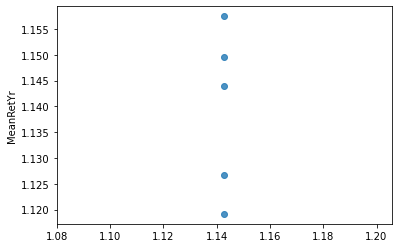

In [31]:
plt.figure()
ax=sns.regplot(x=np.repeat(EW_ME_MutualFunds_yr[1],5),y=EW_BM_MutualFunds_yr, fit_reg=True,order=3)

c:\Users\lewis\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seabor

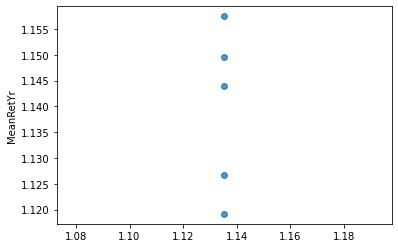

In [32]:
plt.figure()
ax=sns.regplot(x=np.repeat(EW_ME_MutualFunds_yr[2],5),y=EW_BM_MutualFunds_yr, fit_reg=True,order=3)

c:\Users\lewis\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seabor

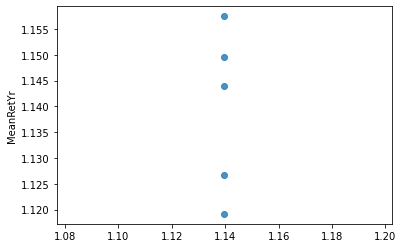

In [33]:
plt.figure()
ax=sns.regplot(x=np.repeat(EW_ME_MutualFunds_yr[3],5),y=EW_BM_MutualFunds_yr, fit_reg=True,order=3)

c:\Users\lewis\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seabor

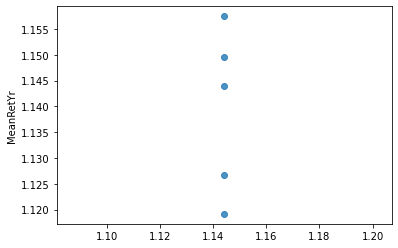

In [34]:
plt.figure()
ax=sns.regplot(x=np.repeat(EW_ME_MutualFunds_yr[4],5),y=EW_BM_MutualFunds_yr, fit_reg=True,order=3)

c:\Users\lewis\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\lewis\anaconda3\lib\site-packages\seabor

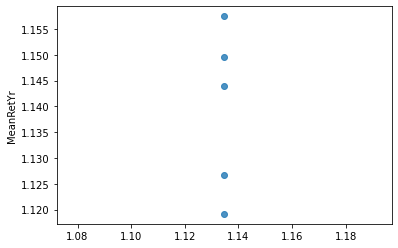

In [35]:
plt.figure()
ax=sns.regplot(x=np.repeat(EW_ME_MutualFunds_yr[5],5),y=EW_BM_MutualFunds_yr, fit_reg=True,order=3)